In [37]:
# Libraries
import pandas as pd 
import numpy as np


In [2]:
# Load dataset

coviddeath = pd.read_excel("CovidDeaths.xlsx")

In [3]:
coviddeath.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,5.00,76.67,0.845
1,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,1.38,75.05,0.779
2,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,5.00,76.67,0.845
3,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,1.38,75.05,0.779
4,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,5.00,76.67,0.845


In [4]:
# Understanding data structure
coviddeath.shape
coviddeath.size

3832695

In [5]:
coviddeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   iso_code                            85171 non-null  object        
 1   continent                           81060 non-null  object        
 2   location                            85171 non-null  object        
 3   date                                85171 non-null  datetime64[ns]
 4   total_cases                         83072 non-null  float64       
 5   new_cases                           83070 non-null  float64       
 6   new_cases_smoothed                  82069 non-null  float64       
 7   total_deaths                        73408 non-null  float64       
 8   new_deaths                          73566 non-null  float64       
 9   new_deaths_smoothed                 82069 non-null  float64       
 10  total_cases_per_millio

In [6]:
coviddeath.describe

<bound method NDFrame.describe of        iso_code      continent   location       date  total_cases  new_cases  \
0           ARG  South America  Argentina 2020-01-01          NaN        NaN   
1           MEX  North America     Mexico 2020-01-01          NaN        NaN   
2           ARG  South America  Argentina 2020-01-02          NaN        NaN   
3           MEX  North America     Mexico 2020-01-02          NaN        NaN   
4           ARG  South America  Argentina 2020-01-03          NaN        NaN   
...         ...            ...        ...        ...          ...        ...   
85166       VNM           Asia    Vietnam 2021-04-30       2928.0       18.0   
85167  OWID_WRL            NaN      World 2021-04-30  151399480.0   879014.0   
85168       YEM           Asia      Yemen 2021-04-30       6317.0       23.0   
85169       ZMB         Africa     Zambia 2021-04-30      91586.0       53.0   
85170       ZWE         Africa   Zimbabwe 2021-04-30      38257.0       22.0   

     

In [7]:
# Data cleaning

# defining the list of columns to keep 
columns_to_keep = [
    'continent', 'location', 'date',
    'total_cases', 'new_cases',
    'total_deaths', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million',
    'population', 'median_age',
    'aged_65_older', 'aged_70_older',
    'extreme_poverty', 'hospital_beds_per_thousand'
]



In [8]:
#new_covid  = covid_death_df[columns_to_keep].copy

new_dataset = coviddeath[columns_to_keep].copy()

In [9]:
new_dataset.head(20)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,median_age,aged_65_older,aged_70_older,extreme_poverty,hospital_beds_per_thousand
0,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00
1,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,29.3,6.857,4.321,2.5,1.38
2,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00
3,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,29.3,6.857,4.321,2.5,1.38
4,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00
5,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,29.3,6.857,4.321,2.5,1.38
6,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00
7,North America,Mexico,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,29.3,6.857,4.321,2.5,1.38
8,Asia,Thailand,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69799978.0,40.1,11.373,6.890,0.1,2.10
9,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00


In [10]:
# Handling missing values
# Fill missing values in continent with "unknown" and replacing missing case/death counts with 0 per country

new_dataset ['continent'] = new_dataset['continent'].fillna('Unknown')



In [11]:
new_dataset

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,median_age,aged_65_older,aged_70_older,extreme_poverty,hospital_beds_per_thousand
0,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519578e+07,31.9,11.198,7.441,0.6,5.000
1,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,29.3,6.857,4.321,2.5,1.380
2,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519578e+07,31.9,11.198,7.441,0.6,5.000
3,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,29.3,6.857,4.321,2.5,1.380
4,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519578e+07,31.9,11.198,7.441,0.6,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Asia,Vietnam,2021-04-30,2928.0,18.0,35.0,0.0,30.081,0.185,0.360,0.000,9.733858e+07,32.6,7.150,4.718,2.0,2.600
85167,Unknown,World,2021-04-30,151399480.0,879014.0,3180238.0,14573.0,19423.142,112.769,407.995,1.870,7.794799e+09,30.9,8.696,5.355,10.0,2.705
85168,Asia,Yemen,2021-04-30,6317.0,23.0,1226.0,4.0,211.795,0.771,41.105,0.134,2.982597e+07,20.3,2.922,1.583,18.8,0.700
85169,Africa,Zambia,2021-04-30,91586.0,53.0,1251.0,1.0,4981.844,2.883,68.048,0.054,1.838396e+07,17.7,2.480,1.542,57.5,2.000


In [12]:
# removing pseudo locations from the dataset

new_dataset = new_dataset[~new_dataset['location'].isin(['International', 'OWID_INT'])]


In [13]:
# Drop any rows where population is missing
new_dataset = new_dataset.dropna(subset=['population'])
# Drop any rows where population is missing
new_dataset['population'].isnull().sum()

np.int64(0)

In [14]:
new_dataset.head(5)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,median_age,aged_65_older,aged_70_older,extreme_poverty,hospital_beds_per_thousand
0,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00
1,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,29.3,6.857,4.321,2.5,1.38
2,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00
3,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,29.3,6.857,4.321,2.5,1.38
4,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45195777.0,31.9,11.198,7.441,0.6,5.00


In [15]:
# fill raw values into cases/deaths

new_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']

# Step 1: Fill raw cases/deaths
case_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
new_dataset[case_cols] = new_dataset.groupby('location')[case_cols].transform(lambda x: x.fillna(0))

# Step 2: Recompute per-million rates from filled raw values
new_dataset['total_cases_per_million']   = new_dataset['total_cases'] / new_dataset['population'] * 1e6
new_dataset['new_cases_per_million']     = new_dataset['new_cases'] / new_dataset['population'] * 1e6
new_dataset['total_deaths_per_million']  = new_dataset['total_deaths'] / new_dataset['population'] * 1e6
new_dataset['new_deaths_per_million']    = new_dataset['new_deaths'] / new_dataset['population'] * 1e6

# Step 3: Ensure no NaNs remain in per-million fields
per_million_cols = [
    'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million'
]
new_dataset[per_million_cols] = new_dataset[per_million_cols].fillna(0)

In [16]:
new_dataset.isnull().sum()

continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
total_deaths                      0
new_deaths                        0
total_cases_per_million           0
new_cases_per_million             0
total_deaths_per_million          0
new_deaths_per_million            0
population                        0
median_age                     7916
aged_65_older                  8792
aged_70_older                  8346
extreme_poverty               32173
hospital_beds_per_thousand    13775
dtype: int64

In [17]:
new_dataset.shape

(84622, 17)

In [18]:
# Using imputation methods for driver cols

driver_cols = ['median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'hospital_beds_per_thousand']

# compute continent level means
# Compute continent-level means
continent_means = new_dataset.groupby('continent')[driver_cols].transform('mean')

# Fill missing values with those means
df_imputed = new_dataset.copy()
for col in driver_cols:
    df_imputed[col] = df_imputed[col].fillna(continent_means[col])

In [19]:
df_imputed

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,median_age,aged_65_older,aged_70_older,extreme_poverty,hospital_beds_per_thousand
0,South America,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.519578e+07,31.9,11.198,7.441,0.6,5.000
1,North America,Mexico,2020-01-01,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.289328e+08,29.3,6.857,4.321,2.5,1.380
2,South America,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.519578e+07,31.9,11.198,7.441,0.6,5.000
3,North America,Mexico,2020-01-02,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.289328e+08,29.3,6.857,4.321,2.5,1.380
4,South America,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.519578e+07,31.9,11.198,7.441,0.6,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Asia,Vietnam,2021-04-30,2928.0,18.0,35.0,0.0,30.080569,0.184922,0.359570,0.000000,9.733858e+07,32.6,7.150,4.718,2.0,2.600
85167,Unknown,World,2021-04-30,151399480.0,879014.0,3180238.0,14573.0,19423.141670,112.769300,407.994884,1.869580,7.794799e+09,30.9,8.696,5.355,10.0,2.705
85168,Asia,Yemen,2021-04-30,6317.0,23.0,1226.0,4.0,211.795305,0.771140,41.105120,0.134111,2.982597e+07,20.3,2.922,1.583,18.8,0.700
85169,Africa,Zambia,2021-04-30,91586.0,53.0,1251.0,1.0,4981.843951,2.882949,68.048466,0.054395,1.838396e+07,17.7,2.480,1.542,57.5,2.000


In [20]:
df_imputed.isnull().sum()

continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
population                    0
median_age                    0
aged_65_older                 0
aged_70_older                 0
extreme_poverty               0
hospital_beds_per_thousand    0
dtype: int64

In [21]:
# Final checks before moving to EDA

df_imputed.dtypes

continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
total_cases_per_million              float64
new_cases_per_million                float64
total_deaths_per_million             float64
new_deaths_per_million               float64
population                           float64
median_age                           float64
aged_65_older                        float64
aged_70_older                        float64
extreme_poverty                      float64
hospital_beds_per_thousand           float64
dtype: object

In [22]:
# Removing duplicates
df_imputed.duplicated(subset=['location','date']).sum()  # should be 0


np.int64(0)

In [23]:
# Checking for negatives

# Zero-floor negative daily counts
df_imputed['new_cases']  = df_imputed['new_cases'].clip(lower=0)
df_imputed['new_deaths'] = df_imputed['new_deaths'].clip(lower=0)

# Then recalculate per-million rates
df_imputed['new_cases_per_million']  = df_imputed['new_cases']  / df_imputed['population'] * 1e6
df_imputed['new_deaths_per_million'] = df_imputed['new_deaths'] / df_imputed['population'] * 1e6

(df_imputed[['new_cases','new_deaths','new_deaths_per_million']] < 0).sum()




new_cases                 0
new_deaths                0
new_deaths_per_million    0
dtype: int64

In [24]:
# Sort by country (location) and then by date, and reset the row index
df_imputed = df_imputed.sort_values(['location', 'date']).reset_index(drop=True)


In [25]:
df_imputed
# data wrangling completed

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,population,median_age,aged_65_older,aged_70_older,extreme_poverty,hospital_beds_per_thousand
0,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.025688,0.025688,0.000000,0.000000,38928341.0,18.6,2.581,1.337,5.626198,0.5
1,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.025688,0.000000,0.000000,0.000000,38928341.0,18.6,2.581,1.337,5.626198,0.5
2,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.025688,0.000000,0.000000,0.000000,38928341.0,18.6,2.581,1.337,5.626198,0.5
3,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.025688,0.000000,0.000000,0.000000,38928341.0,18.6,2.581,1.337,5.626198,0.5
4,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.025688,0.000000,0.000000,0.000000,38928341.0,18.6,2.581,1.337,5.626198,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84617,Africa,Zimbabwe,2021-04-26,38102.0,16.0,1560.0,3.0,2563.559654,1.076504,104.959138,0.201844,14862927.0,19.6,2.822,1.882,21.400000,1.7
84618,Africa,Zimbabwe,2021-04-27,38164.0,62.0,1565.0,5.0,2567.731107,4.171453,105.295545,0.336407,14862927.0,19.6,2.822,1.882,21.400000,1.7
84619,Africa,Zimbabwe,2021-04-28,38191.0,27.0,1565.0,0.0,2569.547708,1.816600,105.295545,0.000000,14862927.0,19.6,2.822,1.882,21.400000,1.7
84620,Africa,Zimbabwe,2021-04-29,38235.0,44.0,1567.0,2.0,2572.508093,2.960386,105.430108,0.134563,14862927.0,19.6,2.822,1.882,21.400000,1.7


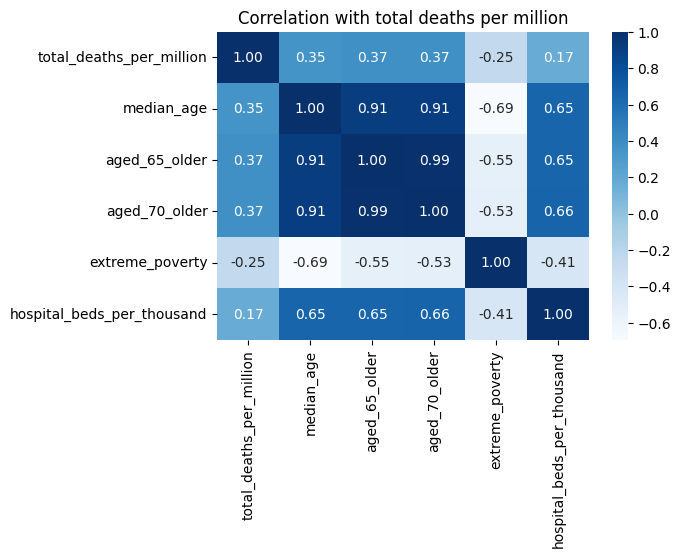

In [26]:
# Exploratory Data Analysis

# Creating a heatmap between covide deaths per million and each key driver

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

driver = [    'median_age', 'aged_65_older', 'aged_70_older',
    'extreme_poverty', 'hospital_beds_per_thousand']

corr_df = df_imputed [['total_deaths_per_million'] + driver]

corr = corr_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title('Correlation with total deaths per million')
plt.show()


# Summary
# Age Matters Most: Countries with older populations (more people aged 65+ or 70+)
#  saw higher COVID deaths per million—this is the strongest link.

# Poverty Shows a “Reverse” Pattern: Poorer countries report fewer 
# deaths per million (correlation ≈ –0.25), but that’s because they tend to 
# have younger populations and less complete reporting, not because poverty 
# protects against COVID.

# Beds & Deaths Move Together: Places with more hospital beds per 
# 1,000 people also show slightly higher death rates (correlation ≈ +0.17). 
# That reflects wealthier, older countries having both more beds and higher 
# recorded mortality.

# Driver Overlap: Median age, % 65+, and % 70+ all correlate above 0.9 with each 
# other—meaning they’re capturing almost the same “population age” effect.

# Takeaway: Age structure is the clearest indicator of a country’s COVID mortality.
#  Poverty and bed capacity correlate next, but only because they’re tied to age 
# and reporting differences.

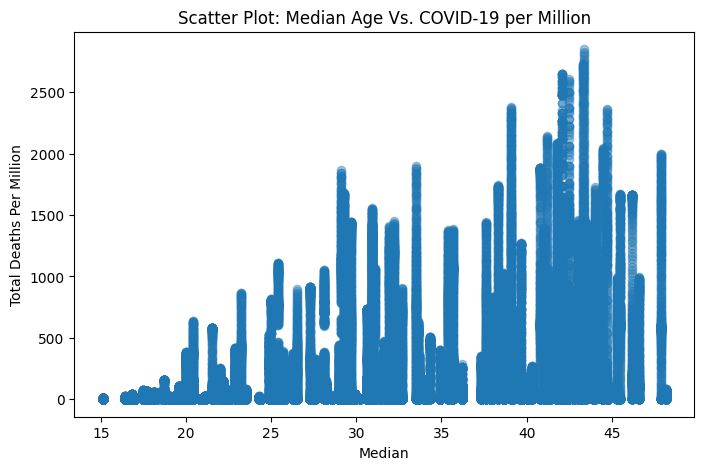

In [27]:
# Scatter plot showing country's median age relates to it's total covid-19 deaths per million

# X-axis - median age
# Y-axis - Total Deaths Per Million

# Scatter plot: median Age Vs Total deaths per million

plt.figure(figsize=(8,5))
plt.scatter(df_imputed['median_age'], df_imputed['total_deaths_per_million'], alpha = 0.4)
plt.xlabel('Median')
plt.ylabel('Total Deaths Per Million')
plt.title("Scatter Plot: Median Age Vs. COVID-19 per Million")
plt.show()



# # Summary
# The scatter plot shows a clear upward pattern:

# Younger countries (median age < 25) almost always stay below 
# 500 deaths per million, and many hover near zero.

# Mid-range countries (median 25–35) spread more widely—from near zero up to 
# about 1,000 deaths per million—reflecting mixed age structures and health-system differences.

# Older countries (median age > 35) reach the highest death tolls,
#  with several climbing above 2,000–3,000 deaths per million.

# Bottom line: As median population age increases, the maximum—and 
# average—COVID-19 mortality rate also rises. There’s scatter 
# (other factors matter), but the overall positive trend reinforces that older 
# populations experienced substantially higher death rates.








/var/folders/3c/q81wwlcs74v7654b041q6trc0000gn/T/ipykernel_17139/2130180925.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_death = latest.groupby('bed_group')['total_deaths_per_million'].mean()


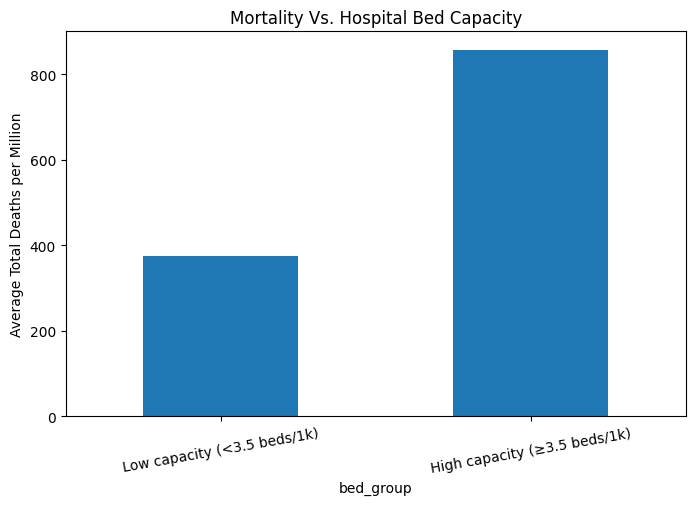

In [28]:
# Hospital bed capacity related to covid-19
# Creating two bin: Low capacity (<3.5 beds per 1000) 
# and High capacity (> 3.5 beds per 1000)
# Compare their avg total with dts per million

# Define bins and labels
#That line is setting up the “cut points” for splitting countries into two groups based on beds-per-thousand:

# df['hospital_beds_per_thousand'].min() - 1
# Takes the smallest bed-count in your data and subtracts 1, ensuring the first bin’s lower edge sits just below your lowest actual value.

# 3.5
# Sets the boundary between “Low capacity” and “High capacity” at 3.5 beds per thousand.

# df['hospital_beds_per_thousand'].max() + 1
# Takes the largest bed-count and adds 1, so the second bin’s upper edge is safely above your highest value.

bins = [df_imputed['hospital_beds_per_thousand'].min() - 1, 3.5, df_imputed['hospital_beds_per_thousand'].max() + 1]
labels = ['Low capacity (<3.5 beds/1k)', 'High capacity (≥3.5 beds/1k)']

# Bin the countries by their hospital bed rate 
latest = df_imputed.sort_values('date').groupby('location').tail(1)
latest['bed_group'] = pd.cut(latest['hospital_beds_per_thousand'], bins = bins, labels = labels)

# Calculate avg dt per group
avg_death = latest.groupby('bed_group')['total_deaths_per_million'].mean()

# Plot
plt.figure(figsize= (8,5))
avg_death.plot(kind= 'bar')
plt.ylabel('Average Total Deaths per Million')
plt.title("Mortality Vs. Hospital Bed Capacity")
plt.xticks(rotation= 10)
plt.tight_layout
plt.show()









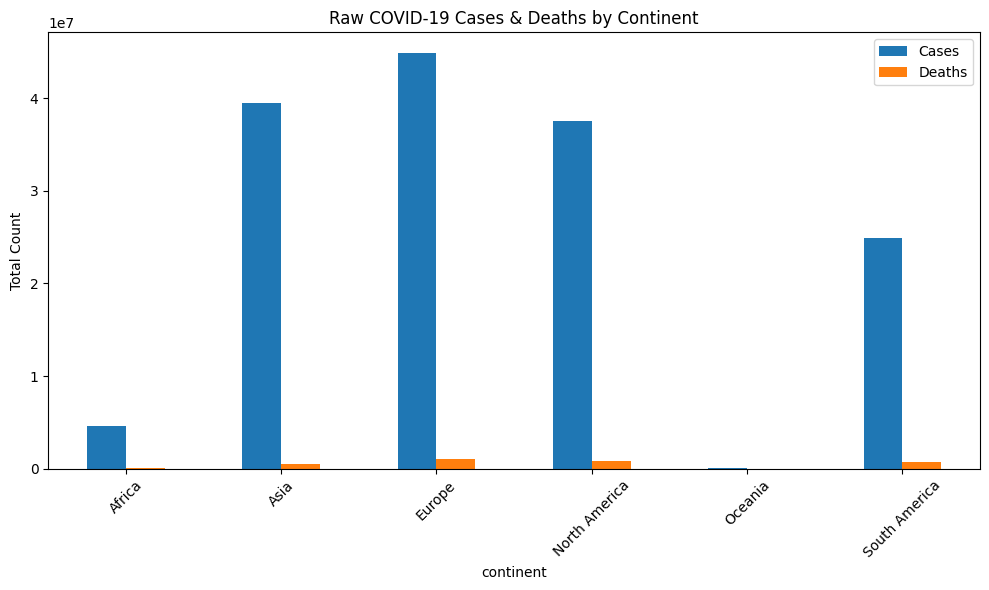

In [29]:
# Get each counties latest totals

# 1. Extract each country's latest record
latest = df_imputed.sort_values('date').groupby('location', as_index=False).last()

# 2. Remove Unknown continents if present
latest = latest[latest['continent'] != 'Unknown']

# 3. Aggregate raw totals by continent
cont_totals = latest.groupby('continent')[['total_cases', 'total_deaths']].sum().reset_index()

# 4. Plot raw totals for cases and deaths by continent
fig, ax = plt.subplots(figsize=(10, 6))
cont_totals.plot(
    x='continent',
    y=['total_cases', 'total_deaths'],
    kind='bar',
    ax=ax
)
ax.set_ylabel('Total Count')
ax.set_title('Raw COVID-19 Cases & Deaths by Continent')
ax.legend(['Cases', 'Deaths'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# Assuming 'latest' is your per-country latest-record DataFrame
cont_summary = (
    latest
    .groupby('continent')[['total_cases', 'total_deaths']]
    .sum()
    .reset_index()
)

print(cont_summary)


       continent  total_cases  total_deaths
0         Africa    4557699.0      121784.0
1           Asia   39526308.0      520286.0
2         Europe   44863478.0     1016750.0
3  North America   37529488.0      847942.0
4        Oceania      43570.0        1046.0
5  South America   24878216.0      672415.0


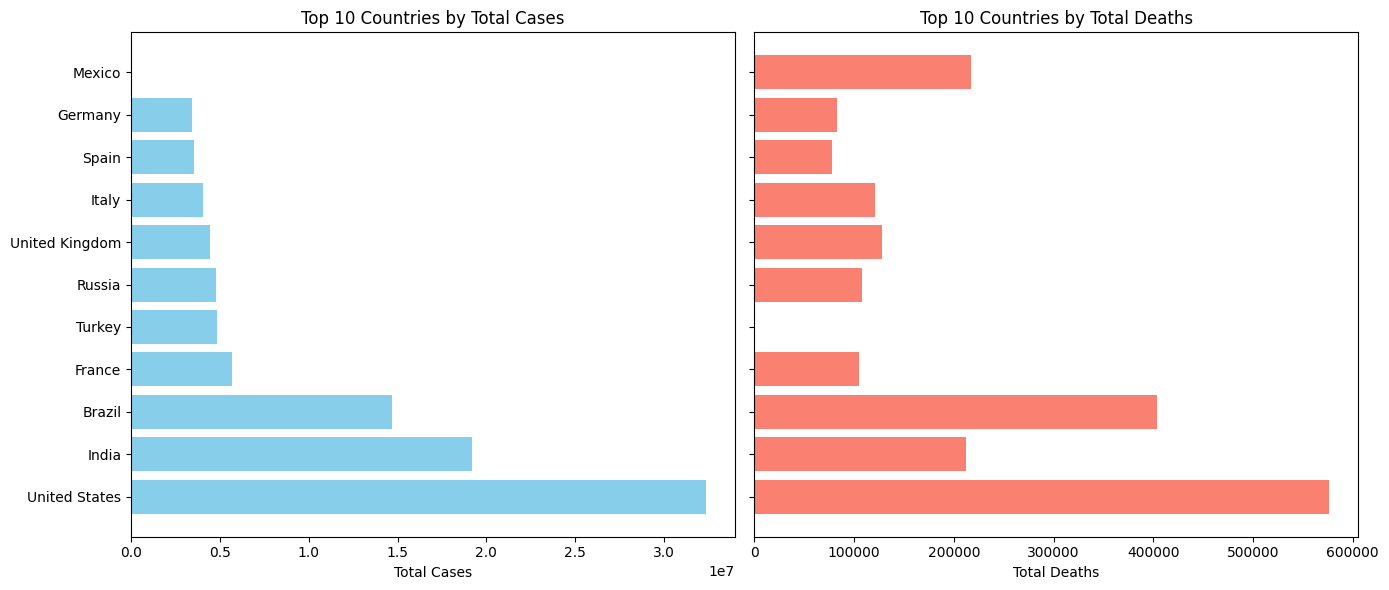

In [31]:
# 1. Get each location’s final cumulative totals
latest = df_imputed.sort_values('date').groupby('location', as_index=False).last()

# 2. Drop specific aggregates
to_remove = ['World', 'South America', 'North America', 'Europe', 'Asia', 'European Union', 'Africa']
latest = latest[~latest['location'].isin(to_remove)]

# 3. Now take Top 10 real countries
top10_cases  = latest.nlargest(10, 'total_cases')[['location','total_cases']]
top10_deaths = latest.nlargest(10, 'total_deaths')[['location','total_deaths']]

# 4. Plot side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharey=True)

ax1.barh(top10_cases['location'], top10_cases['total_cases'], color='skyblue')
ax1.set_title ('Top 10 Countries by Total Cases')
ax1.set_xlabel('Total Cases')
ax1.invert_yaxis()

ax2.barh(top10_deaths['location'], top10_deaths['total_deaths'], color='salmon')
ax2.set_title ('Top 10 Countries by Total Deaths')
ax2.set_xlabel('Total Deaths')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

In [32]:
# vaccination rate vs mortality rate

# Merge in the vaccination data and plot for each continent, 7 day rolling avg of new 
# vaccinations 



# Data Wrangling 
# Load Vaccination dataset
vacc = pd.read_excel("CovidVaccinations.xlsx")



In [33]:
# Data pre-processing
# Keeping the ones required
vacc = vacc[['continent',
    'location',
    'date',
    'new_vaccinations',
    'total_vaccinations',
    'people_fully_vaccinated',
    'people_fully_vaccinated_per_hundred']]

In [34]:
# Check null value
vacc.isnull().sum()

continent                               4111
location                                   0
date                                       0
new_vaccinations                       77217
total_vaccinations                     75797
people_fully_vaccinated                78740
people_fully_vaccinated_per_hundred    78740
dtype: int64

In [35]:
# 
df_map = df_imputed[['location', 'continent']].drop_duplicates()

# Ensure continent is filled
vacc = vacc.drop(columns = 'continent').merge(df_map, on= 'location', how = 'left')

# Sort ffil
vacc = vacc.sort_values(['location', 'date'])

# Impute new dose
vacc['new_vaccinations'] = vacc['new_vaccinations'].clip(lower = 0).fillna(0)

# FFill cummulatives, then fill any leading NaN with 0 
for col in ['total_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']:
    vacc[col] = vacc.groupby('location')[col] \
                   .transform(lambda x: x.ffill().fillna(0))


In [42]:
vacc = vacc.dropna(subset=['continent','population'])
vacc.isnull().sum()

location                               0
date                                   0
new_vaccinations                       0
total_vaccinations                     0
people_fully_vaccinated                0
people_fully_vaccinated_per_hundred    0
continent                              0
population                             0
dtype: int64

In [50]:
# 7 day rolling average 
# Computing new vaccinations per million

vacc['new_vaccinations_per_million'] = (
    vacc['new_vaccinations'] 
    / vacc['population'] 
    * 1e6
)

# Compute 7 day rolling avg
# It turns noisy daily data into a clearer week long trend line
vacc['vax_7d_avg'] = (
    vacc
    .sort_values(['location','date'])
    .groupby('location')['new_vaccinations_per_million']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

vacc.head(10)




df_imputed['deaths_7d_avg'] = (
    df_imputed
    .sort_values(['location','date'])
    .groupby('location')['new_deaths_per_million']
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

vacc['vax_7d_avg'] = (
    vacc
    .sort_values(['location','date'])
    .groupby('location')['new_vaccinations_per_million']
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)


In [52]:
# Merging Vaccination Dataset with Covid deaths dataset

ts = pd.merge(
    df_imputed[['location','date','deaths_7d_avg']],
    vacc[['location','date','vax_7d_avg']],
    on=['location','date'],
    how='inner'
)

ts.head(10)

,location,date,deaths_7d_avg,vax_7d_avg
0,Afghanistan,2020-02-24,0.0,0.0
1,Afghanistan,2020-02-25,0.0,0.0
2,Afghanistan,2020-02-26,0.0,0.0
3,Afghanistan,2020-02-27,0.0,0.0
4,Afghanistan,2020-02-28,0.0,0.0
5,Afghanistan,2020-02-29,0.0,0.0
6,Afghanistan,2020-03-01,0.0,0.0
7,Afghanistan,2020-03-02,0.0,0.0
8,Afghanistan,2020-03-03,0.0,0.0
9,Afghanistan,2020-03-04,0.0,0.0


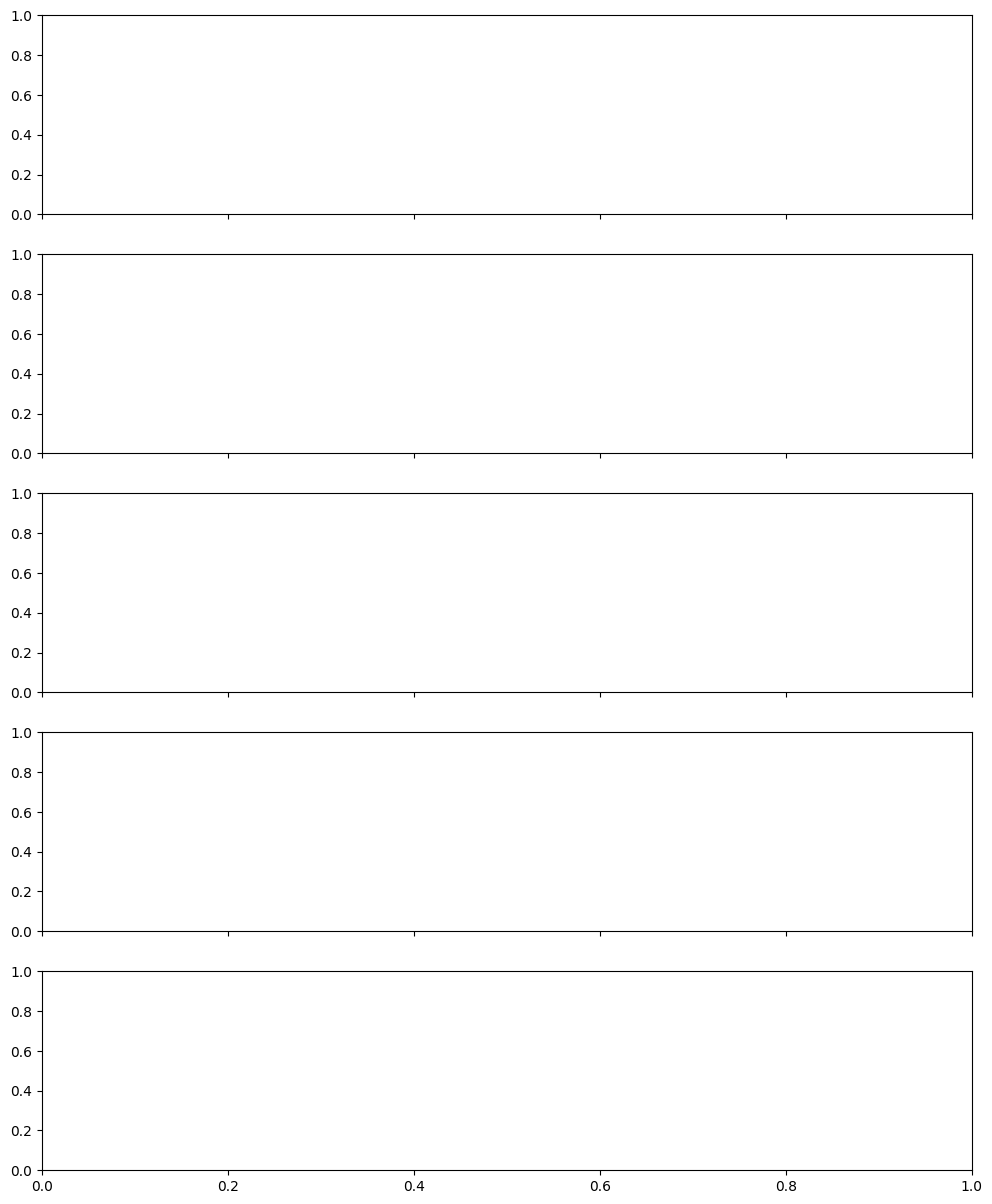

In [ ]:
# Pick top5 countries

top5 = (
    df_imputed
    .groupby('location')['total_cases'] # Look at each locations cummulative cases
    .last() # Pick the last most recent record
    .nlargest(5) #Pick the 5 largest values
    .index # extract their names
)

# The top 5 locations with the biggest outbreaks is ready (Highest Mortality rate)


# Creating a vertical stack of columns
fig, axes = plt.subplots(
  len(top5), 1,            # one row per country, single column
  figsize=(12, 3*len(top5)),
  sharex=True               # all share the same date axis at the bottom
)

# Loop over each country and it's subplot
for ax, loc in zip(axes, top5):
    sub = ts[ts['location']==loc]  # filter the merged table to just that country

